The Museum of Modern Art (MoMA) Collection - Exploratory Data Analysis and Visualization 

In [4]:
# Dataset Licensing: 

# Dataset from: The Museum of Modern Art (MoMA) Collection 
# Source: https://github.com/MuseumofModernArt/collection 
# License: CC0 1.0 Universal (Public Domain Dedication)

In [5]:
# Work to do: 

# Check the missing values in all your columns. Pay attention that not all missing values will be NaNs. Make sure that non-nan values are valid.
# Check data type of all your columns and make sure they corresponde with what you expect them to be. 
# Dates should be of datetime format, numbers should be of either int or float.
# Plot distribution of numeric columns and histogram of categorical columns.
# Calculate and visualize top 5 nationalities of artists.
# Calculate and visualize top 5 nationalities of artists by gender.
# Merge two dataframes using ConstituentID as the key.
# Pick a nationality and filter the merged data to find all artworks done by artists of that nationality. 
# How do you handle artworks that have multiple artists?
# Do one extra analysis of your data that picked your interest.

#multiples in artworks
#create a list of unqiue values

In [6]:
# Dataset info: 

# Research dataset contains 156,633 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in our database. It includes basic metadata for each work, including:
# Title, artist, date made, medium, dimensions, and date acquired by the Museum. 

# Artists dataset contains 15,595 records, representing all the artists who have work in MoMA's collection and have been cataloged in our database. It includes basic metadata for each artist, including: 
# Artist name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.

In [7]:
!pip install pandas

In [8]:
import pandas as pd

In [9]:
# Load csv from computer 

path_artworks = '/Users/lenaivian/Downloads/Artworks-2.csv'
artworks = pd.read_csv(path_artworks)

path_artists = '/Users/lenaivian/Downloads/Artists-2.csv'
artists = pd.read_csv(path_artists)

In [10]:
# Check column names

print(artworks.columns)
print(artists.columns)

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ImageURL', 'OnView',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')
Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')


In [11]:
# Check datatypes

print(artworks.dtypes)
print(artists.dtypes)

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ImageURL               object
OnView                 object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object
ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality

In [12]:
# Checking missing values in columns

artworks.isnull().sum()
artists.isnull().sum()

ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2488
Gender            3243
BeginDate            0
EndDate              0
Wiki QID         12348
ULAN             12664
dtype: int64

In [13]:
# Code only showed artists missing values ^

In [14]:
artworks.isnull().sum()

Title                     48
Artist                  1261
ConstituentID           1261
ArtistBio               6078
Nationality             1261
BeginDate               1261
EndDate                 1261
Gender                  1261
Date                    2016
Medium                  9254
Dimensions              8644
CreditLine              1524
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            6786
Cataloged                  0
ObjectID                   0
URL                    56619
ImageURL               65969
OnView                155358
Circumference (cm)    156623
Depth (cm)            138818
Diameter (cm)         155164
Height (cm)            28747
Length (cm)           155922
Weight (kg)           156337
Width (cm)             29674
Seat Height (cm)      156633
Duration (sec.)       154681
dtype: int64

In [15]:
artists.isnull().sum()

ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2488
Gender            3243
BeginDate            0
EndDate              0
Wiki QID         12348
ULAN             12664
dtype: int64

In [16]:
#Dates should be of datetime format

artists['BeginDate'] = pd.to_datetime(artists['BeginDate'], format='%Y', errors='coerce')
artists['EndDate'] = pd.to_datetime(artists['EndDate'], format='%Y', errors='coerce')

artworks['BeginDate'] = pd.to_datetime(artists['BeginDate'], format='%Y', errors='coerce')
artworks['EndDate'] = pd.to_datetime(artists['EndDate'], format='%Y', errors='coerce')


In [57]:
(artworks.head())
artworks['Date'].value_counts()

Date
1967                                                      2060
n.d.                                                      1980
1965                                                      1970
1966                                                      1858
1968                                                      1844
                                                          ... 
Nice, place Charles-Félix, c. 1931                           1
1962 (replica of 1926 original)                              1
Issy-les-Moulineaux, by May 13, 1913 - early fall 1916       1
c. 1900–06                                                   1
c. 1929-40                                                   1
Name: count, Length: 8408, dtype: int64

In [18]:
print(artists.head())

   ConstituentID      DisplayName            ArtistBio Nationality Gender  \
0              1   Robert Arneson  American, 1930–1992    American   male   
1              2   Doroteo Arnaiz   Spanish, born 1936     Spanish   male   
2              3      Bill Arnold  American, born 1941    American   male   
3              4  Charles Arnoldi  American, born 1946    American   male   
4              5      Per Arnoldi    Danish, born 1941      Danish   male   

   BeginDate    EndDate  Wiki QID         ULAN  
0 1930-01-01 1992-01-01       NaN          NaN  
1 1936-01-01        NaT       NaN          NaN  
2 1941-01-01        NaT       NaN          NaN  
3 1946-01-01        NaT  Q1063584  500027998.0  
4 1941-01-01        NaT       NaN          NaN  


In [19]:
# Check datatypes

print(artworks.dtypes)
print(artists.dtypes)

Title                         object
Artist                        object
ConstituentID                 object
ArtistBio                     object
Nationality                   object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Gender                        object
Date                          object
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired                  object
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
W

In [20]:
# Change ConstituentID in artists to be an int, similar to how it is in artworks

numeric_columns = ['ConstituentID']

# Apply pd.to_numeric to columns and change to int
artworks[numeric_columns] = artworks[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')


In [21]:
print(artworks.head())

                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist  ConstituentID  \
0               Otto Wagner           6210   
1  Christian de Portzamparc           7470   
2                Emil Hoppe           7605   
3           Bernard Tschumi           7056   
4                Emil Hoppe           7605   

                                   ArtistBio Nationality  BeginDate  \
0                      (Austrian, 1841–1918)  (Austrian) 1930-01-01   
1                        (French, born 1944)    (French) 1936-01-01   
2                      (Austrian, 1876–1957)  (Austrian) 1941-01-01   
3  (French and Swiss, born Switzerland 1944)          () 1946-01-01   
4                      (Austria

In [22]:
# Check datatypes

print(artworks.dtypes)
print(artists.dtypes)

Title                         object
Artist                        object
ConstituentID                  Int64
ArtistBio                     object
Nationality                   object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Gender                        object
Date                          object
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired                  object
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
W

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Artworks dataset that contain floats

numeric_columns = ['Circumference (cm)','Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)', 'Weight (kg)','Width (cm)', 'Seat Height (cm)','Duration (sec.)','ULAN' ]

In [25]:
print(artworks.dtypes)

Title                         object
Artist                        object
ConstituentID                  Int64
ArtistBio                     object
Nationality                   object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Gender                        object
Date                          object
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired                  object
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
W

In [26]:
# Artworks dataset that contain object for categorical columns

category_columns = ['Title','Nationality', 'Gender', 'Medium']

In [27]:
print(artworks.isnull().sum())

Title                     48
Artist                  1261
ConstituentID           9161
ArtistBio               6078
Nationality             1261
BeginDate             144593
EndDate               151081
Gender                  1261
Date                    2016
Medium                  9254
Dimensions              8644
CreditLine              1524
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            6786
Cataloged                  0
ObjectID                   0
URL                    56619
ImageURL               65969
OnView                155358
Circumference (cm)    156623
Depth (cm)            138818
Diameter (cm)         155164
Height (cm)            28747
Length (cm)           155922
Weight (kg)           156337
Width (cm)             29674
Seat Height (cm)      156633
Duration (sec.)       154681
dtype: int64


In [28]:
print(Artworks.isnull().sum())

NameError: name 'Artworks' is not defined

In [ ]:
print("Missing values in artworks DataFrame:")
print(artworks.isnull().sum())

In [ ]:
#FIll missing values for category variables
artworks['Nationality'].fillna('Unknown', inplace=True)
artworks['Gender'].fillna('Unknown', inplace=True)
artworks['Medium'].fillna('Unknown', inplace=True)

In [ ]:
print("Missing values in artists DataFrame:")
print(artists.isnull().sum())

In [ ]:
#fill missing values for artist. values
artists['ArtistBio'].fillna('Unknown', inplace=True)
artists['Nationality'].fillna('Unknown', inplace=True)
artists['Gender'].fillna('Unknown', inplace=True)

In [ ]:
#fill missing values for dates
artists['BeginDate'].fillna(0, inplace=True)
artists['EndDate'].fillna(0, inplace=True)

In [ ]:
print(artworks.head())

In [ ]:
print(artworks.tail())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# List of numeric columns to plot
numeric_columns = ['Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
                   'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)', 'Duration (sec.)']

# Plot histograms for each numeric column
artworks[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numeric Columns', size=16)
plt.show()


In [ ]:
print("Missing values in artworks DataFrame:")
print(artworks.isnull().sum())

# Check for missing values in the artists DataFrame
print("Missing values in artists DataFrame:")
print(artists.isnull().sum())

In [ ]:
# Check for empty strings in categorical columns for `artworks`
category_columns = ['Title', 'Artist', 'Nationality', 'Gender', 'Medium', 'Dimensions', 'CreditLine']

for column in category_columns:
    empty_strings = artworks[artworks[column] == ""].shape[0]
    print(f"Number of empty strings in '{column}' column: {empty_strings}")

In [ ]:
# Check data types for both DataFrames
print("Data types in artworks DataFrame:")
print(artworks.dtypes)

print("nData types in artists DataFrame:")
print(artists.dtypes)

In [ ]:
artworks['Date'] = pd.to_datetime(artworks['Date'], errors='coerce')
artworks['DateAcquired'] = pd.to_datetime(artworks['DateAcquired'], errors='coerce')

In [ ]:
# Convert `ULAN` to Int64, which can handle missing values (NaNs)
artists['ULAN'] = artists['ULAN'].astype('Int64')

In [ ]:
print("Updated data types in artworks DataFrame:")
print(artworks.dtypes)

print("Updated data types in artists DataFrame:")
print(artists.dtypes)

In [ ]:
# Check for 0 values or negative values in numeric columns
numeric_columns = ['Height (cm)', 'Width (cm)', 'Weight (kg)', 'Circumference (cm)', 'Diameter (cm)']

for column in numeric_columns:
    invalid_values = artworks[(artworks[column] <= 0) & (~artworks[column].isnull())].shape[0]
    print(f"Number of invalid values (<= 0) in '{column}' column: {invalid_values}")

In [ ]:
import numpy as np

In [ ]:
# Replace 0 and negative values in 'Height (cm)' and 'Width (cm)' with NaN
artworks['Height (cm)'] = artworks['Height (cm)'].replace({0: np.nan, -np.inf: np.nan})
artworks['Width (cm)'] = artworks['Width (cm)'].replace({0: np.nan, -np.inf: np.nan})

# Verify that the changes have been made
print("Number of NaN values in 'Height (cm)' column after replacement:", artworks['Height (cm)'].isna().sum())
print("Number of NaN values in 'Width (cm)' column after replacement:", artworks['Width (cm)'].isna().sum())

In [ ]:
print("Final missing values check in artworks DataFrame:")
print(artworks.isnull().sum())

print("\nFinal missing values check in artists DataFrame:")
print(artists.isnull().sum())


In [ ]:
print("Data types in artworks DataFrame:")
print(artworks.dtypes)

print("\nData types in artists DataFrame:")
print(artists.dtypes)


In [ ]:
artworks['Height (cm)'].replace(0, np.nan, inplace=True)
artworks['Width (cm)'].replace(0, np.nan, inplace=True)

In [ ]:
# Check again for remaining 0 values in 'Height (cm)' and 'Width (cm)'
print("Number of 0 values in 'Height (cm)' column:", (artworks['Height (cm)'] == 0).sum())
print("Number of 0 values in 'Width (cm)' column:", (artworks['Width (cm)'] == 0).sum())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# List of numeric columns in `artworks`
numeric_columns = ['Height (cm)', 'Width (cm)', 'Weight (kg)', 'Circumference (cm)', 
                   'Depth (cm)', 'Diameter (cm)', 'Length (cm)', 'Seat Height (cm)', 'Duration (sec.)']

# Plot histograms for each numeric column
artworks[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numeric Columns', size=16)
plt.show()

In [ ]:
# Check summary statistics for all numeric columns
print("Summary Statistics for Numeric Columns in Artworks DataFrame:")
print(artworks[numeric_columns].describe())

In [ ]:
# Check summary statistics for all numeric columns
print("Summary Statistics for Numeric Columns in Artworks DataFrame:")
print(artworks[numeric_columns].describe())

In [ ]:
# Define reasonable limits for each column based on your data
filtered_artworks = artworks[(artworks['Height (cm)'] < 300) &  # Example: Set limit for height
                             (artworks['Width (cm)'] < 300) &   # Example: Set limit for width
                             (artworks['Weight (kg)'] < 5000)]  # Example: Set limit for weight

# Plot histograms for filtered data
filtered_artworks[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numeric Columns (Filtered Data)', size=16)
plt.show()

In [ ]:
# List of categorical columns to visualize
category_columns = ['Nationality', 'Gender', 'Medium', 'Classification', 'Department']

In [ ]:
# Check for missing values and empty strings in each categorical column
print("Missing and empty values in each categorical column:")
for column in category_columns:
    missing_count = artworks[column].isna().sum()
    empty_count = (artworks[column] == "").sum()
    print(f"{column}: {missing_count} missing values, {empty_count} empty strings")

In [ ]:
import matplotlib.pyplot as plt

# Loop through each categorical column and plot a bar chart
for column in category_columns:
    plt.figure(figsize=(12, 6))  # Set the figure size for better readability
    artworks[column].value_counts().plot(kind='bar', color='lightgreen')  # Create a bar chart
    plt.title(f'Distribution of {column}', size=16)  # Set the title for each plot
    plt.xlabel(column)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability if necessary
    plt.show()  # Display the plot

In [ ]:
# Loop through each categorical column and create a bar chart if the column has data
for column in category_columns:
    if artworks[column].value_counts().empty:
        print(f"Skipping column '{column}' as it has no data.")
        continue  # Skip plotting for empty columns

    plt.figure(figsize=(12, 6))
    artworks[column].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Distribution of {column}', size=16)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [29]:
# Check the number of rows and columns in the DataFrame
print("Shape of the Artworks DataFrame:", artworks.shape)

# Check the first few rows of the DataFrame (if any exist)
print("First few rows of the DataFrame:")
print(artworks.head())

Shape of the Artworks DataFrame: (156633, 30)
First few rows of the DataFrame:
                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist  ConstituentID  \
0               Otto Wagner           6210   
1  Christian de Portzamparc           7470   
2                Emil Hoppe           7605   
3           Bernard Tschumi           7056   
4                Emil Hoppe           7605   

                                   ArtistBio Nationality  BeginDate  \
0                      (Austrian, 1841–1918)  (Austrian) 1930-01-01   
1                        (French, born 1944)    (French) 1936-01-01   
2                      (Austrian, 1876–1957)  (Austrian) 1941-01-01   
3  (French and Swiss, b

In [30]:
# Replace missing values and empty strings with 'Unknown'
category_columns = ['Nationality', 'Gender', 'Medium', 'Classification', 'Department']
artworks[category_columns] = artworks[category_columns].fillna('Unknown').replace('', 'Unknown')

# Verify that missing values have been handled
print("Missing values after reloading and replacing:")
print(artworks[category_columns].isna().sum())

Missing values after reloading and replacing:
Nationality       0
Gender            0
Medium            0
Classification    0
Department        0
dtype: int64


In [32]:
# Load csv from computer 

path_artworks = '/Users/lenaivian/Downloads/Artworks-3.csv'
artworks = pd.read_csv(path_artworks)

path_artists = '/Users/lenaivian/Downloads/Artists-2.csv'
artists = pd.read_csv(path_artists)

In [33]:
# Check datatypes

print(artworks.dtypes)
print(artists.dtypes)

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ImageURL               object
OnView                 object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object
ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality

In [34]:
# Checking missing values in columns

artworks.isnull().sum()
artists.isnull().sum()

ConstituentID        0
DisplayName          0
ArtistBio         2194
Nationality       2488
Gender            3243
BeginDate            0
EndDate              0
Wiki QID         12348
ULAN             12664
dtype: int64

In [35]:
#Dates should be of datetime format

artists['BeginDate'] = pd.to_datetime(artists['BeginDate'], format='%Y', errors='coerce')
artists['EndDate'] = pd.to_datetime(artists['EndDate'], format='%Y', errors='coerce')

artworks['BeginDate'] = pd.to_datetime(artists['BeginDate'], format='%Y', errors='coerce')
artworks['EndDate'] = pd.to_datetime(artists['EndDate'], format='%Y', errors='coerce')

In [36]:
# Check datatypes

print(artworks.dtypes)
print(artists.dtypes)

Title                         object
Artist                        object
ConstituentID                 object
ArtistBio                     object
Nationality                   object
BeginDate             datetime64[ns]
EndDate               datetime64[ns]
Gender                        object
Date                          object
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired                  object
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
W

In [41]:
# Change ConstituentID in artists to be an int, similar to how it is in artworks

numeric_columns = ['ConstituentID']

# Apply pd.to_numeric to columns and change to int
artworks[numeric_columns] = artworks[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [42]:
# Artworks dataset that contain floats

numeric_columns = ['Circumference (cm)','Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)', 'Weight (kg)','Width (cm)', 'Seat Height (cm)','Duration (sec.)','ULAN' ]

In [43]:
# Artworks dataset that contain object for categorical columns

category_columns = ['Title','Nationality', 'Gender', 'Medium']

In [44]:
# Display the first few rows of the updated Artworks DataFrame
print("First few rows of the Artworks DataFrame:")
print(artworks.head())

# Display the first few rows of the updated Artists DataFrame
print("First few rows of the Artists DataFrame:")
print(artists.head())

First few rows of the Artworks DataFrame:
                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist  ConstituentID  \
0               Otto Wagner           6210   
1  Christian de Portzamparc           7470   
2                Emil Hoppe           7605   
3           Bernard Tschumi           7056   
4                Emil Hoppe           7605   

                                   ArtistBio Nationality  BeginDate  \
0                      (Austrian, 1841–1918)  (Austrian) 1930-01-01   
1                        (French, born 1944)    (French) 1936-01-01   
2                      (Austrian, 1876–1957)  (Austrian) 1941-01-01   
3  (French and Swiss, born Switzerland 1944)          () 194

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Replace missing values in numeric and categorical columns
numeric_columns = ['Depth (cm)','Height (cm)','Length (cm)','Width (cm)']

category_columns = ['Nationality', 'Gender', 'Medium', 'Classification', 'Department']

# Fill missing values
artworks[numeric_columns] = artworks[numeric_columns].fillna(0)  # Replace NaN with 0 for numeric columns
artworks[category_columns] = artworks[category_columns].fillna('Unknown')  # Replace NaN with 'Unknown' for categorical columns

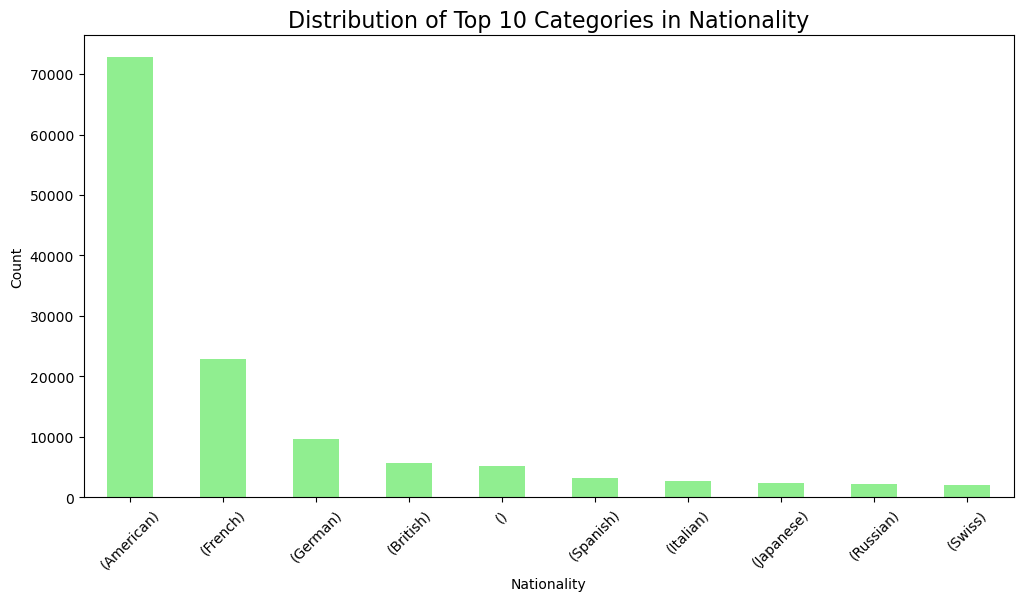

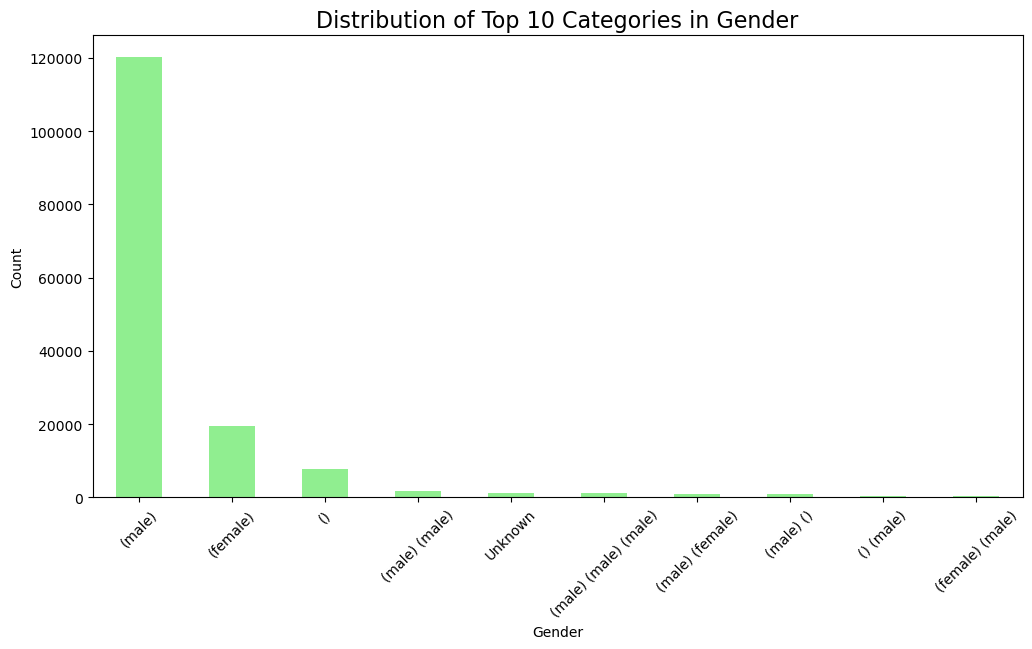

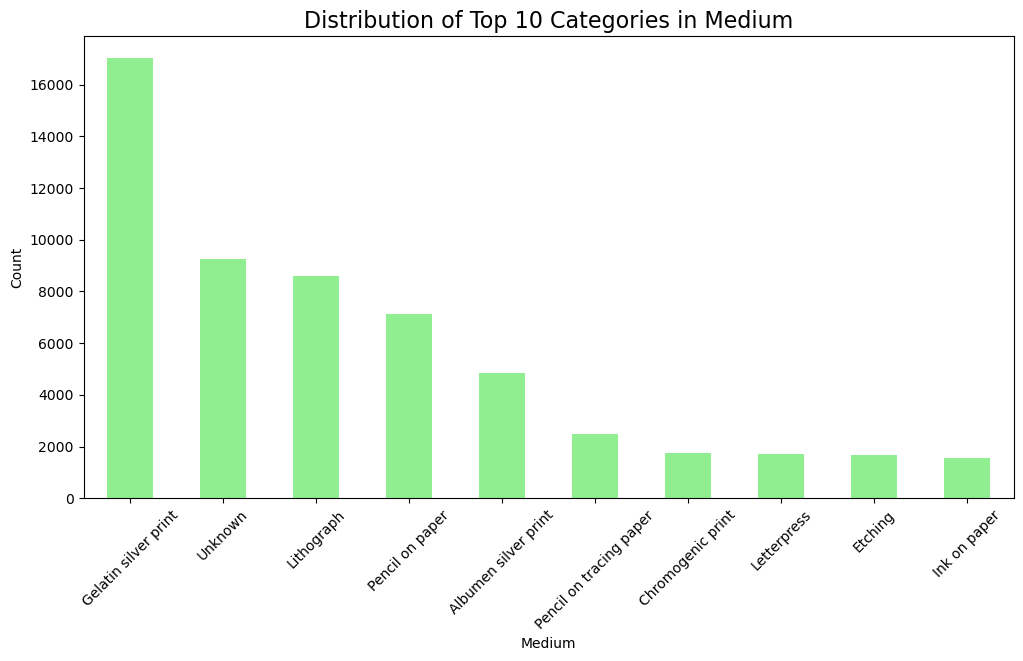

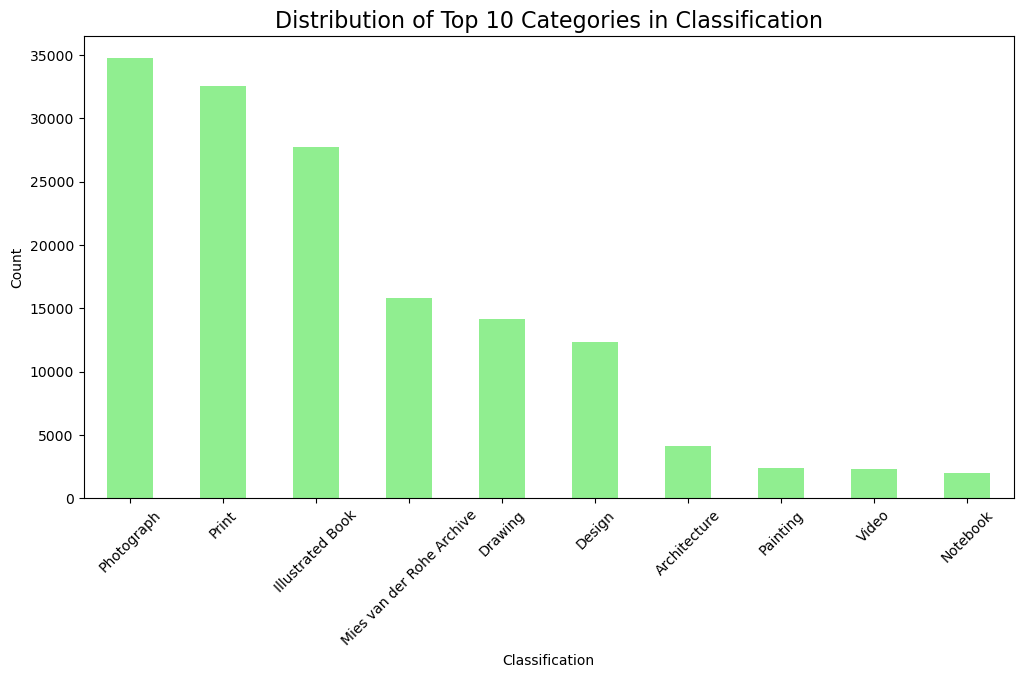

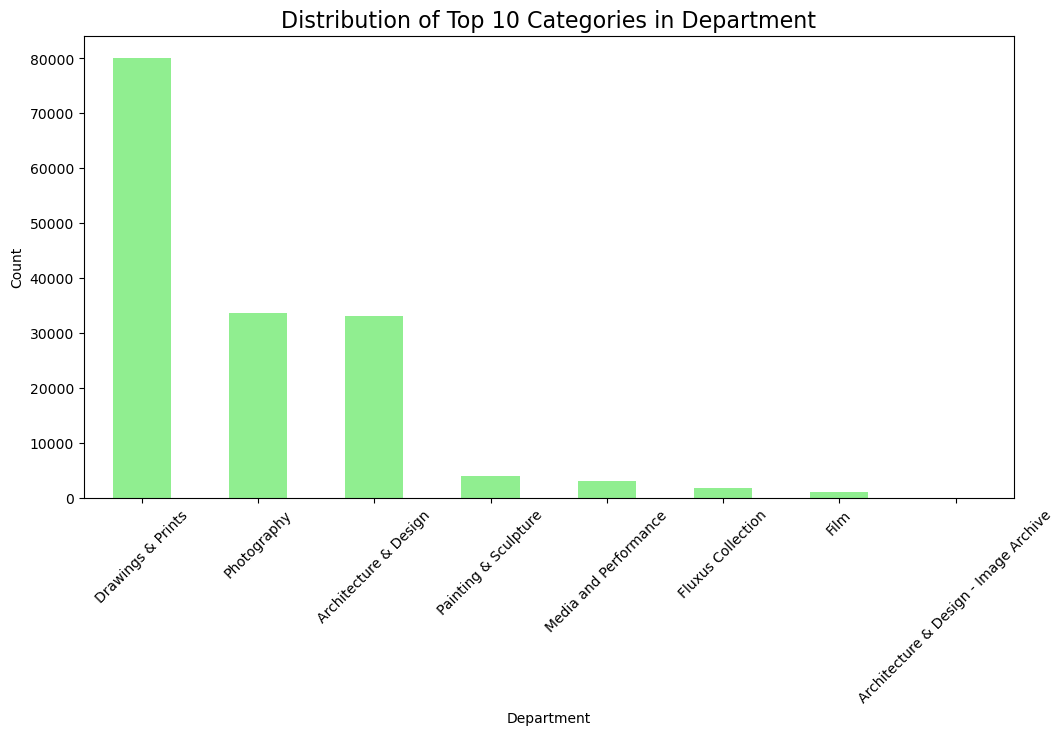

In [49]:
# Plot bar charts for all categorical columns
for column in category_columns:
    plt.figure(figsize=(12, 6))
    artworks[column].value_counts().nlargest(10).plot(kind='bar', color='lightgreen')
    plt.title(f'Distribution of Top 10 Categories in {column}', size=16)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

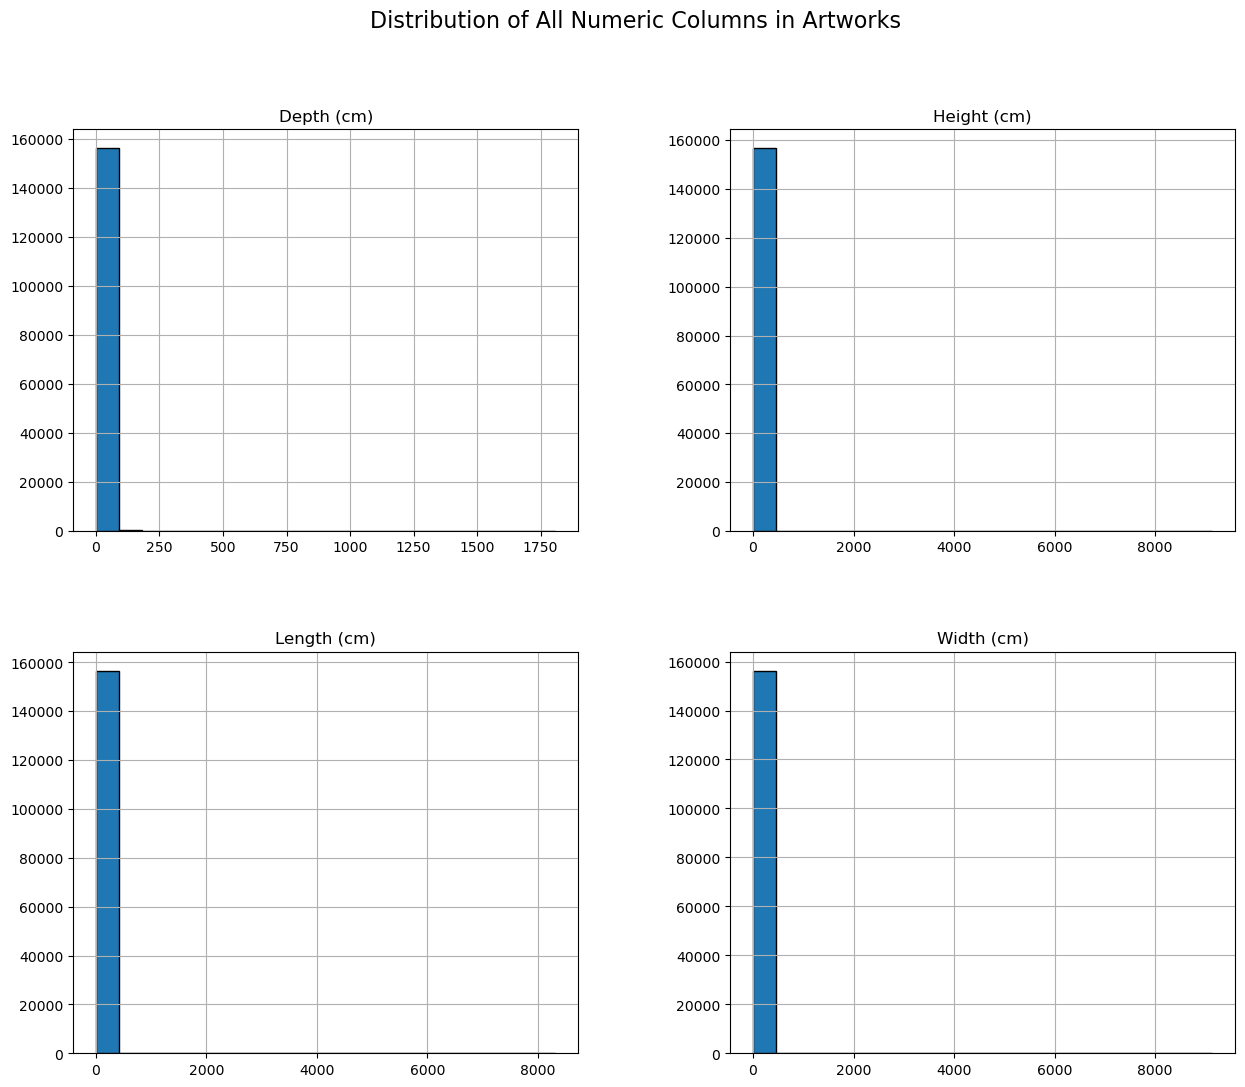

In [50]:
# Plot histograms for all numeric columns
artworks[numeric_columns].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distribution of All Numeric Columns in Artworks', size=16)
plt.show()

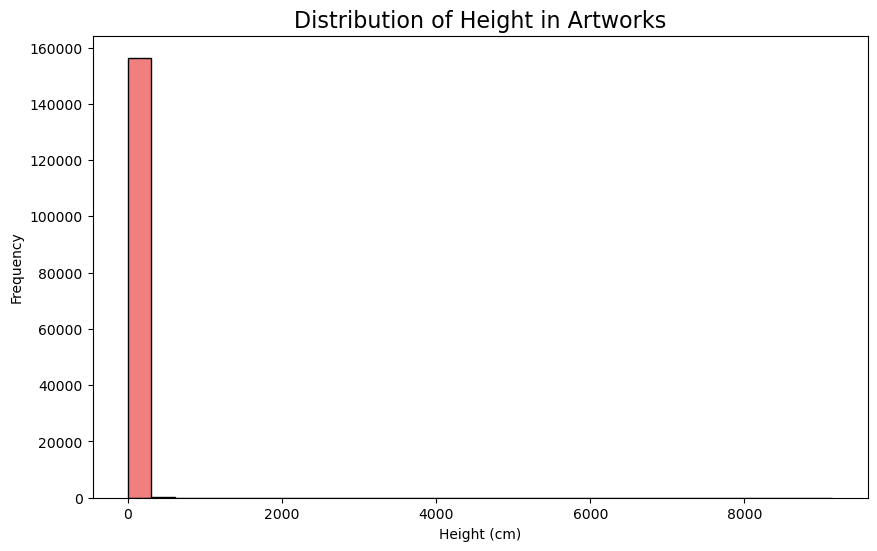

In [51]:
# Plot a histogram for the 'Height (cm)' column
plt.figure(figsize=(10, 6))
artworks['Height (cm)'].plot(kind='hist', bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Height in Artworks', size=16)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()